In [1]:
# LIBRARY

import numpy as np # vector manipulation
import sys
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")



In [2]:
def H(x):
    a=270 # Hz/nA
    b=108 # Hz
    d=.154 # seconds
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

In [3]:
def total_synaptic_current(S_1,S_2,S_3,S_4,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_13=0*0.000497/np.sqrt(2) # nA
    J_24=0*0.000497/np.sqrt(2) # nA
  
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+J_13*S_3+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+J_24*S_4+I_0+I_2+I_noise_2
    return x_1, x_2



In [4]:
def Background_Activity(I_noise):
    h=0.1
    sigma_noise=0.02 # nA
    tau_AMPA=2 #ms
    eta_noise=np.random.normal(0,1,1)
    k=0#(-(I_noise)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    I_noise_new=I_noise+h/tau_AMPA*(-(I_noise+h/2*k)+eta_noise
                                *np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

In [5]:
def Network_Dynamics_VIS(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.100 #s
    k=(-S/tau_S+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

def Network_Dynamics_AUDIO(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    #tau_S=.10 #s
    tau_S=.100 #s
    k=(-S/tau_S+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2/10000 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1+(c_dash)/100)
    return I_motion

In [7]:
h=0.1
time=np.arange(-100,1500,h)
J_A_ext=0.00052 # nA/Hz
mu_0=30 # Hz
STIMULUS=[15.0]#,7.5,10.0,15.0]


Threshold=20
N=1000


ALL_F_1=0.2*np.ones((N,len(time)))
ALL_F_2=0.2*np.ones((N,len(time)))
I_VIS_EXCITE=0.0*np.ones((N,len(time))) # np.zeros((1,len(time)))
I_VIS_INHIB=0.0*np.ones((N,len(time))) # np.zeros((1,len(time)))
Firing_target_VIS_EXCITE=0.2*np.ones((N,len(time))) # np.zeros((1,len(time)))
Firing_target_VIS_INHIB=0.2*np.ones((N,len(time))) # np.zeros((1,len(time)))
Firing_target_AUDIO_EXCITE=0.2*np.ones((N,len(time))) # np.zeros((1,len(time)))
Firing_target_AUDIO_INHIB=0.2*np.ones((N,len(time))) # np.zeros((1,len(time)))




j=0
#for j in range(0,len(Vector_coherence)):
for k in range(0,1):
  
    ANSWER_VIS=np.zeros(N)
    RT_VIS=np.zeros(N)
    ANSWER_AUDIO=np.zeros(N)
    RT_AUDIO=np.zeros(N)
    ANSWER_AV=np.zeros(N)
    RT_AV=np.zeros(N)




    
    I_noise_VIS_EXCITE=0.001*np.random.normal(0,1,(N,len(time)))
    I_noise_VIS_INHIB=0.001*np.random.normal(0,1,(N,len(time)))

    x_VIS_EXCITE=J_A_ext*mu_0*np.random.uniform(0,1,(N,len(time)))
    x_VIS_INHIB=J_A_ext*mu_0*np.random.uniform(0,1,(N,len(time)))
    x_AUDIO_EXCITE=J_A_ext*mu_0*np.random.uniform(0,1,(N,len(time)))
    x_AUDIO_INHIB=J_A_ext*mu_0*np.random.uniform(0,1,(N,len(time)))


    S_VIS_EXCITE=0.2*np.ones((N,len(time)))+0.01*np.random.normal(0,1,(N,len(time)))
    S_VIS_INHIB=0.2*np.ones((N,len(time)))+0.01*np.random.normal(0,1,(N,len(time))) 
    S_AUDIO_EXCITE=0.2*np.ones((N,len(time)))+0.01*np.random.normal(0,1,(N,len(time)))
    S_AUDIO_INHIB=0.2*np.ones((N,len(time)))+0.01*np.random.normal(0,1,(N,len(time))) 




    Firing_target_VIS_EXCITE[:,0]=H(x_VIS_EXCITE[:,0])
    Firing_target_VIS_INHIB[:,0]=H(x_VIS_INHIB[:,0])
    Firing_target_AUDIO_EXCITE[:,0]=H(x_VIS_EXCITE[:,0])
    Firing_target_AUDIO_INHIB[:,0]=H(x_VIS_INHIB[:,0])



    count_AUDIO=np.zeros(N)

    count_VIS=np.zeros(N)
    count_AV=np.zeros(N)
    for i in range (0,len(time)-1):
        if time[i] >=0 and time[i]<1000:
            c_dash=STIMULUS[0]
        else:
            c_dash=0.0


        I_noise_VIS_EXCITE[:,i+1]=Background_Activity(I_noise_VIS_EXCITE[:,i])
        I_noise_VIS_INHIB[:,i+1]=Background_Activity(I_noise_VIS_INHIB[:,i])

        I_VIS_EXCITE[:,i+1]=I_input_1(c_dash)
        I_VIS_INHIB[:,i+1]=I_input_1(-c_dash)

        S_VIS_EXCITE[:,i+1]=Network_Dynamics_VIS(S_VIS_EXCITE[:,i],x_VIS_EXCITE[:,i])
        S_VIS_INHIB[:,i+1]=Network_Dynamics_VIS(S_VIS_INHIB[:,i],x_VIS_INHIB[:,i])
        x_VIS_EXCITE[:,i+1],x_VIS_INHIB[:,i+1]=total_synaptic_current(S_VIS_EXCITE[:,i],S_VIS_INHIB[:,i],S_AUDIO_EXCITE[:,i],S_AUDIO_INHIB[:,i],I_VIS_EXCITE[:,i],I_VIS_INHIB[:,i],I_noise_VIS_EXCITE[:,i],I_noise_VIS_INHIB[:,i])
        
        Firing_target_VIS_EXCITE[:,i+1]=H(x_VIS_EXCITE[:,i+1])
        Firing_target_VIS_INHIB[:,i+1]=H(x_VIS_INHIB[:,i+1])
        
        
        I_noise_VIS_EXCITE[:,i+1]=Background_Activity(I_noise_VIS_EXCITE[:,i])
        I_noise_VIS_INHIB[:,i+1]=Background_Activity(I_noise_VIS_INHIB[:,i])


        x_AUDIO_EXCITE[:,i+1],x_AUDIO_INHIB[:,i+1]=total_synaptic_current(S_AUDIO_EXCITE[:,i],S_AUDIO_INHIB[:,i],S_VIS_EXCITE[:,i],S_VIS_INHIB[:,i],I_VIS_EXCITE[:,i],I_VIS_INHIB[:,i],I_noise_VIS_EXCITE[:,i],I_noise_VIS_INHIB[:,i])
        S_AUDIO_EXCITE[:,i+1]=Network_Dynamics_AUDIO(S_AUDIO_EXCITE[:,i],x_AUDIO_EXCITE[:,i])
        S_AUDIO_INHIB[:,i+1]=Network_Dynamics_AUDIO(S_AUDIO_INHIB[:,i],x_AUDIO_INHIB[:,i])
        Firing_target_AUDIO_EXCITE[:,i+1]=H(x_AUDIO_EXCITE[:,i+1])
        Firing_target_AUDIO_INHIB[:,i+1]=H(x_AUDIO_INHIB[:,i+1])
       
        A_VIS=Firing_target_VIS_EXCITE[:,i]>=Threshold
        B=count_VIS <0.5 
        RT_VIS[A_VIS&B]=time[i]
        count_VIS[A_VIS&B]=1
        
        A_AUDIO=Firing_target_AUDIO_EXCITE[:,i]>=Threshold
        B=count_AUDIO <0.5 
        RT_AUDIO[A_AUDIO&B]=time[i]
        count_AUDIO[A_AUDIO&B]=1
        
        A_AV=A_AUDIO|A_VIS

        B=count_AV <0.5 
        RT_AV[A_AV&B]=time[i]
        count_AV[A_AV&B]=1



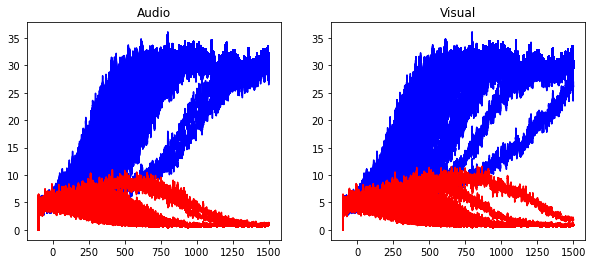

In [14]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(time,Firing_target_AUDIO_EXCITE.T,'b')
plt.plot(time,Firing_target_AUDIO_INHIB.T,'r')
plt.title('Audio')
plt.subplot(122)
plt.plot(time,Firing_target_VIS_EXCITE.T,'b')
plt.plot(time,Firing_target_VIS_INHIB.T,'r')
plt.title('Visual')
plt.show()

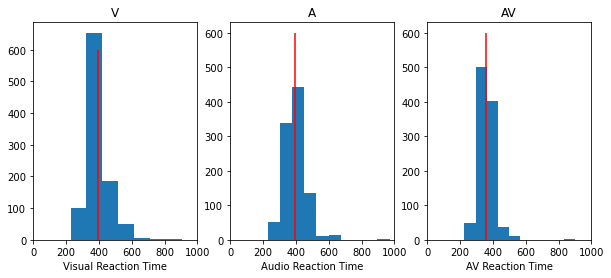

397.31979999997174
393.6486999999719


360.1944999999738

In [15]:
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.hist(RT_VIS)
plt.vlines(np.mean(RT_VIS),0,600,color='red')
plt.xlim(0,1000)

plt.xlabel('Visual Reaction Time')
plt.title('V')


plt.subplot(132)
plt.hist(RT_AUDIO)
plt.xlabel('Audio Reaction Time')
plt.vlines(np.mean(RT_AUDIO),0,600,color='red')
plt.xlim(0,1000)



plt.title('A')

plt.subplot(133)
plt.hist(RT_AV)
plt.vlines(np.mean(RT_AV),0,600,color='red')
plt.xlabel('AV Reaction Time')
plt.title('AV')
plt.xlim(0,1000)


plt.savefig('AV_Behavioural.png', bbox_inches='tight',dpi=300)
plt.show()
print(np.mean(RT_AUDIO))
print(np.mean(RT_VIS))

np.mean(RT_AV)

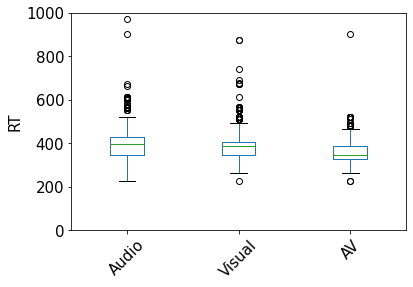

Ttest_indResult(statistic=12.085489110533416, pvalue=1.6649620465563193e-32)

In [16]:
df=pd.DataFrame({'Audio': RT_AUDIO, 'Visual': RT_VIS,'AV':RT_AV})
#from matplotlib import pyplot as plt

fig = plt.figure(figsize=(6,4))
ax=df.boxplot(grid=False, rot=45, fontsize=15)
#fig.set_ylabel('RT')
ax.set_ylabel('RT', fontsize=15)
ax.set_ylim((0,1000))
#df.boxplot(grid=False, rot=45, fontsize=15)
plt.show()


ttest_ind(df['Visual'],df['AV'])

In [17]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Audio', 'Visual', 'AV'])
# replace column names
df_melt.columns = ['index', 'condition', 'RT']

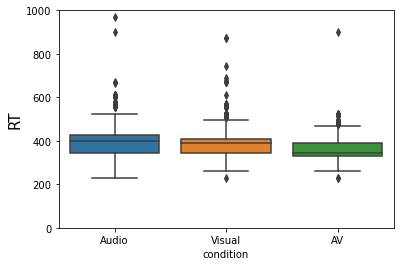

In [20]:

fig = plt.figure(figsize=(6,4))
ax=sns.boxplot(x='condition', y='RT', data=df_melt)
ax.set_ylabel('RT', fontsize=15)
ax.set_ylim((0,1000))
plt.show()

In [13]:

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('RT ~ C(condition)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(condition),8.369828e+05,2.0,100.402344,6.229599e-43
Residual,1.249193e+07,2997.0,NaN,NaN
